**Neural Network**

A neural network is a computational model inspired by the structure and functioning of the human brain's neural networks. It consists of interconnected nodes, called neurons or units, organized into layers. Neural networks are a fundamental component of deep learning, a subset of machine learning algorithms.

Here are the key components and characteristics of neural networks:

**Neurons (Nodes):** Neurons are basic computational units that receive input signals, perform a computation, and produce an output signal. Each neuron typically applies a nonlinear activation function to its weighted inputs to introduce nonlinearity and enable the network to learn complex patterns.

**Layers:** A neural network is organized into layers of neurons. The three main types of layers are:
Input Layer: This layer receives the initial input data and passes it to the subsequent layers.

**Hidden Layers:** These layers perform intermediate computations and transformations on the input data. Deep neural networks have multiple hidden layers, allowing them to learn hierarchical representations of the input data.
Output Layer: This layer produces the final output or prediction of the network. The number of neurons in the output layer depends on the nature of the task (e.g., regression, classification).

**Connections (Edges):** Neurons in adjacent layers are connected by weighted edges, which represent the strength of the connections between neurons. Each connection has an associated weight parameter that determines its influence on the neuron's output. During training, these weights are adjusted through a process called backpropagation to minimize the difference between the predicted output and the true output.

**Activation Functions:** Activation functions introduce nonlinearity into the neural network, allowing it to learn complex relationships in the data. Common activation functions include sigmoid, tanh, ReLU (Rectified Linear Unit), and softmax (used in the output layer for multi-class classification).

**Feedforward and Backpropagation:** In the feedforward pass, input data is propagated through the network layer by layer, with each neuron applying its activation function to produce an output. During training, the network's predictions are compared to the ground truth, and the error is propagated backward through the network using the backpropagation algorithm. This process updates the weights of the connections to minimize the error and improve the network's performance.

**Training:** Neural networks are trained using large datasets through an optimization process called stochastic gradient descent (SGD) or its variants. The network learns to recognize patterns and make accurate predictions by adjusting its weights based on the error calculated during training.

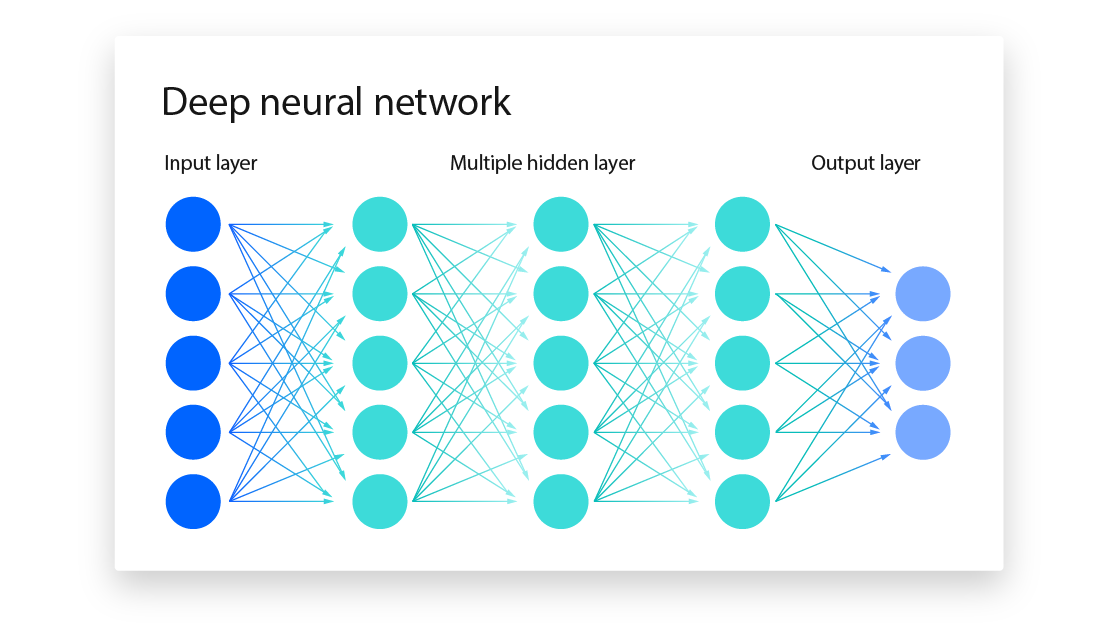

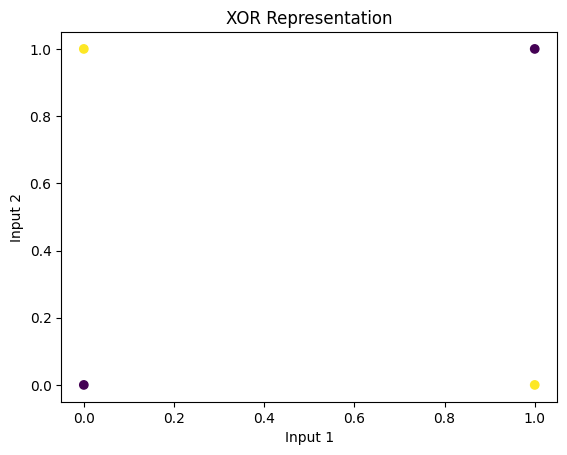

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Define the XOR data points
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Representation')
plt.show()


In [10]:

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):

        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)

        # Initialize biases
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.bias_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward propagation
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_input_hidden)
        self.predicted_output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Backpropagation
        error = y - self.predicted_output
        output_delta = error * self.sigmoid_derivative(self.predicted_output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

        self.bias_hidden_output += np.sum(output_delta, axis=0) * learning_rate
        self.bias_input_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward and backward pass
            output = self.forward(X)
            self.backward(X, y, learning_rate)

            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}: Loss = {loss}")


def XOR():  # (XOR problem)
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([[0],
                  [1],
                  [1],
                  [0]])

    # Initialize and train the neural network
    neural_network = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    neural_network.train(X, y, epochs=10000, learning_rate=0.1)

    # Test the trained model
    print("Predictions after training:")
    print(neural_network.forward(X))

XOR()

Epoch 0: Loss = 0.2708305737944448
Epoch 1000: Loss = 0.23450995149975615
Epoch 2000: Loss = 0.1609911087741073
Epoch 3000: Loss = 0.068151392625392
Epoch 4000: Loss = 0.021591804172953272
Epoch 5000: Loss = 0.010090366777157734
Epoch 6000: Loss = 0.006101101535962058
Epoch 7000: Loss = 0.0042348865434268905
Epoch 8000: Loss = 0.0031902222094112413
Epoch 9000: Loss = 0.0025346228525452825
Predictions after training:
[[0.04193083]
 [0.9491826 ]
 [0.96277701]
 [0.05131178]]
